In [197]:
import numpy as np
import pandas as pd

In [198]:
fear_greed = pd.read_csv(r"C:\Users\HP\Downloads\fear_greed_index.csv")
fear_greed.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [239]:
fear_greed.shape

(2644, 4)

In [243]:
fear_greed.classification.value_counts()

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

In [199]:
trades = pd.read_csv(r"C:\Users\HP\Downloads\historical_data.csv")
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [241]:
trades.shape

(79225, 16)

In [200]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [201]:
fear_gred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   object        
 4   Date            2644 non-null   datetime64[ns]
 5   date_only       2644 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 124.1+ KB


### Clean And Preprocess

In [203]:
# Convert timestamps to datetime
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], errors='coerce')
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')

In [204]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [205]:
# Drop null date values (important for merge_asof)
trades = trades.dropna(subset=['Timestamp IST'])
fear_greed = fear_greed.dropna(subset=['date'])

In [206]:
# Sort before merge_asof
trades = trades.sort_values('Timestamp IST')
fear_greed = fear_greed.sort_values('date')


In [207]:
# Merge trades with sentiment (classification) on nearest date
merged = pd.merge_asof(
    trades,
    fear_greed,
    left_on='Timestamp IST',
    right_on='date',
    direction='backward'
)


### EDA :- Exploratory Data Analysis

In [209]:
print("Merged Data Shape:", merged.shape)

Merged Data Shape: (79225, 20)


In [210]:
fear_gred['classification'].value_counts()

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

In [211]:
# 1. Average PnL by Sentiment
avg_pnl_by_sentiment = merged.groupby('classification')['Closed PnL'].mean()

# 2. Win Rate by Sentiment
merged['is_win'] = merged['Closed PnL'] > 0
win_rate_by_sentiment = merged.groupby('classification')['is_win'].mean()

# 3. Most Traded Coins by Sentiment
most_traded_coins = merged.groupby(['classification', 'Coin']).size().reset_index(name='Trade Count')

# 4. Average Trade Size USD by Sentiment
avg_size_usd = merged.groupby('classification')['Size USD'].mean()

# 5. Average Trade Size Tokens by Sentiment
avg_size_tokens = merged.groupby('classification')['Size Tokens'].mean()

# 6. Buy/Sell Distribution by Sentiment
buy_sell_distribution = merged.groupby(['classification', 'Side']).size().reset_index(name='Count')

# Output results
print("Average PnL by Sentiment:\n", avg_pnl_by_sentiment)
print("\nWin Rate by Sentiment:\n", win_rate_by_sentiment)
print("\nMost Traded Coins by Sentiment:\n", most_traded_coins)
print("\nAverage Trade Size USD by Sentiment:\n", avg_size_usd)
print("\nAverage Trade Size Tokens by Sentiment:\n", avg_size_tokens)
print("\nBuy/Sell Distribution by Sentiment:\n", buy_sell_distribution)


Average PnL by Sentiment:
 classification
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             48.740034
Neutral           27.088803
Name: Closed PnL, dtype: float64

Win Rate by Sentiment:
 classification
Extreme Fear     0.292777
Extreme Greed    0.553282
Fear             0.381787
Greed            0.421056
Neutral          0.494920
Name: is_win, dtype: float64

Most Traded Coins by Sentiment:
     classification     Coin  Trade Count
0     Extreme Fear     @107           67
1     Extreme Fear       @4           28
2     Extreme Fear      @49            4
3     Extreme Fear       @8            2
4     Extreme Fear     AAVE            3
..             ...      ...          ...
492        Neutral      XRP           25
493        Neutral  ZEREBRO            2
494        Neutral       ZK            2
495        Neutral    kBONK           99
496        Neutral    kPEPE           55

[497 rows x 3 columns]

Average Trade Size USD by Sentiment

### Visualization

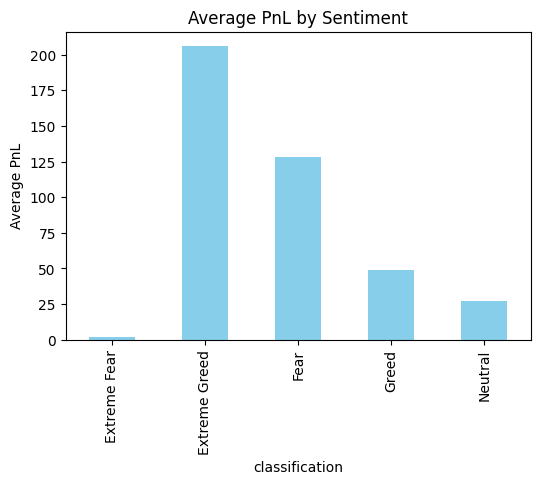

In [213]:
plt.figure(figsize=(6,4))
avg_pnl_by_sentiment.plot(kind='bar', color='skyblue')
plt.title("Average PnL by Sentiment")
plt.ylabel("Average PnL")
plt.show()

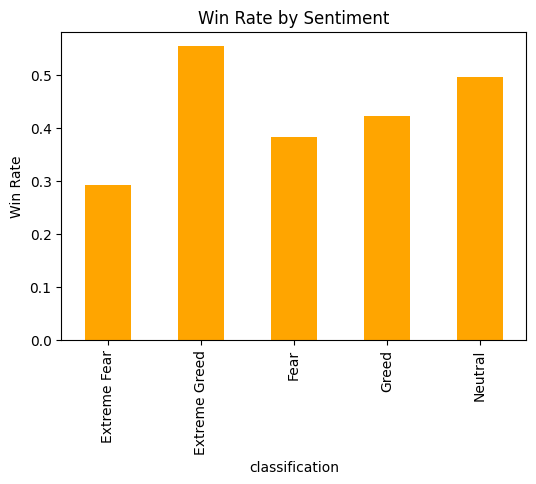

In [214]:
plt.figure(figsize=(6,4))
win_rate_by_sentiment.plot(kind='bar', color='orange')
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.show()

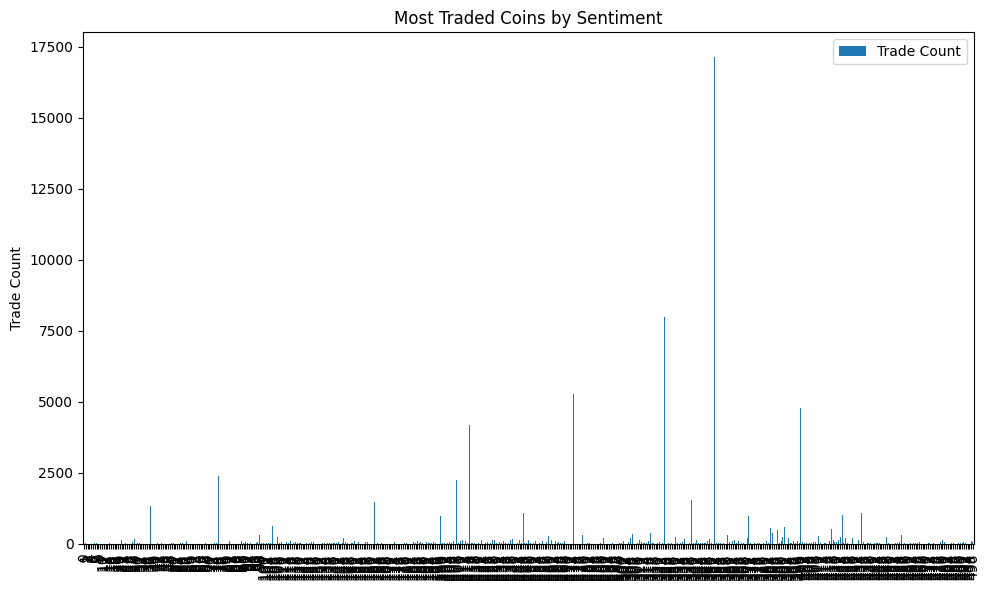

In [215]:
most_traded_coins.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Most Traded Coins by Sentiment")
plt.ylabel("Trade Count")
plt.tight_layout()
plt.show()


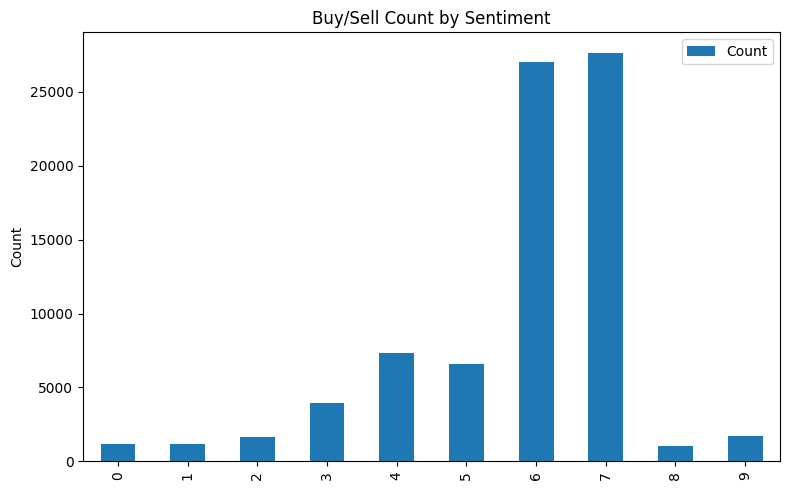

In [216]:
buy_sell_distribution.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Buy/Sell Count by Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

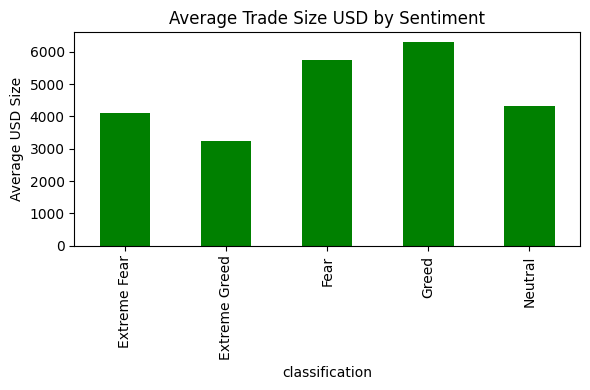

In [217]:
plt.figure(figsize=(6,4))
avg_size_usd.plot(kind='bar', color='green')
plt.title("Average Trade Size USD by Sentiment")
plt.ylabel("Average USD Size")
plt.tight_layout()
plt.show()

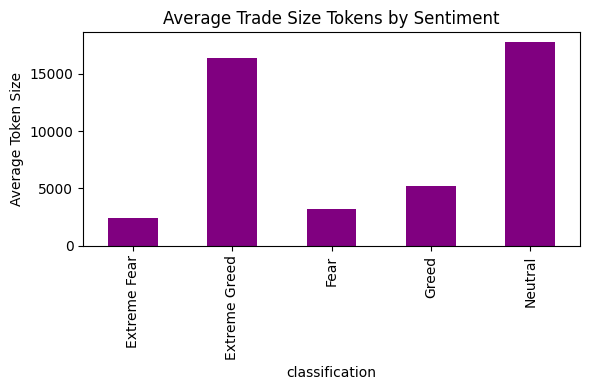

In [218]:

plt.figure(figsize=(6,4))
avg_size_tokens.plot(kind='bar', color='purple')
plt.title("Average Trade Size Tokens by Sentiment")
plt.ylabel("Average Token Size")
plt.tight_layout()
plt.show()